# Comparing Ordinary Least Squares[OLS] and Stochastic Gradient Descent[SGD] for Boston Housing Price Prediction

## Problem Statement

To predict the median value of owner-occupied homes in Boston, Massachusetts, based on a set of 13 features such as crime rate, average number of rooms per dwelling, etc. We aim to compare the performance of two different regression models, Ordinary Least Squares (OLS) and Stochastic Gradient Descent (SGD), in predicting the target variable. We also aim to perform exploratory data analysis (EDA) to gain insights into the dataset and visualize the relationships between the features and target variable.

## Data Definition

In [ ]:
The Boston Housing dataset used in this project contains information collected by the U.S Census Service concerning housing in the area of Boston, Massachusetts. It includes 506 instances with 13 features describing the properties of the housing blocks. The features are as follows:

*CRIM: Per capita crime rate by town
    
*ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.
    
*INDUS: Proportion of non-retail business acres per town
    
*CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    
*NOX: Nitric oxides concentration (parts per 10 million)
    
*RM: Average number of rooms per dwelling
    
*AGE: Proportion of owner-occupied units built prior to 1940
    
*DIS: Weighted distances to five Boston employment centers
    
*RAD: Index of accessibility to radial highways
    
*TAX: Full-value property tax rate per $10,000
    
*PTRATIO: Pupil-teacher ratio by town
    
*B: 1000(Bk - 0.63)^2 where Bk is the proportion of black residents by town
    
*LSTAT: % lower status of the population
    
The target variable is the median value of owner-occupied homes, in thousands of dollars (MEDV).

## Importing Libraries

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

## Read Data

In [66]:
df=pd.read_csv(r'G:\final project\project 2\The Boston Housing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## EDA (Exploratory Data Analysis)

In [52]:
# Add column names
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = column_names


In [53]:
# Dimensions of the data
df.shape

(506, 14)

In [54]:
#Checking for Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [55]:
# By default the describe function returns the summary of numerical variables
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


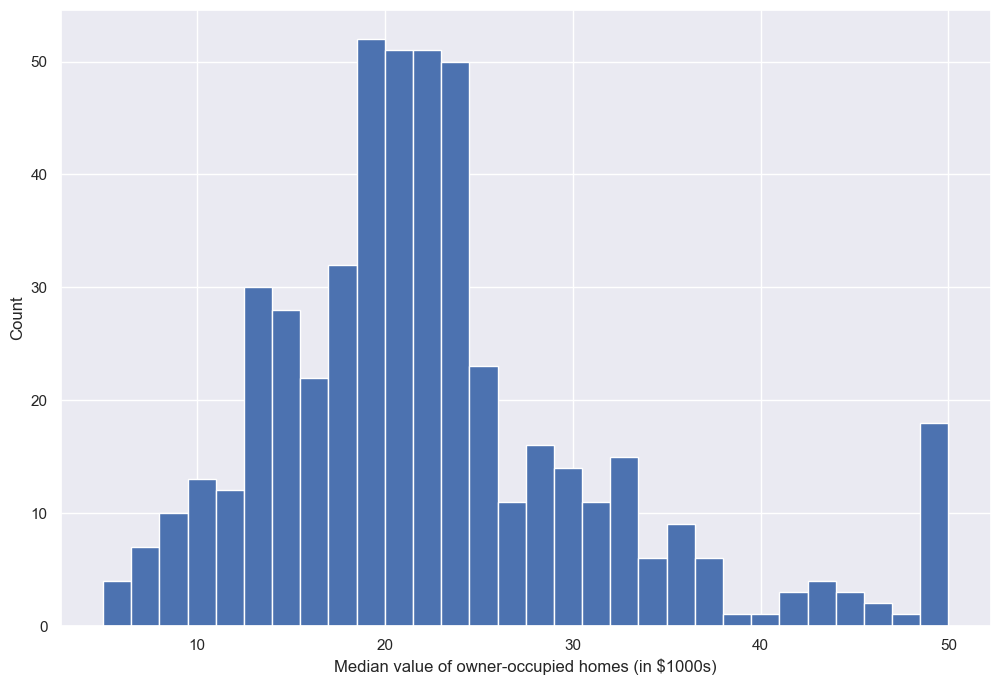

In [86]:
# Plot histogram of target variable
plt.hist(df['MEDV'], bins=30)
plt.xlabel('Median value of owner-occupied homes (in $1000s)')
plt.ylabel('Count')
plt.show()

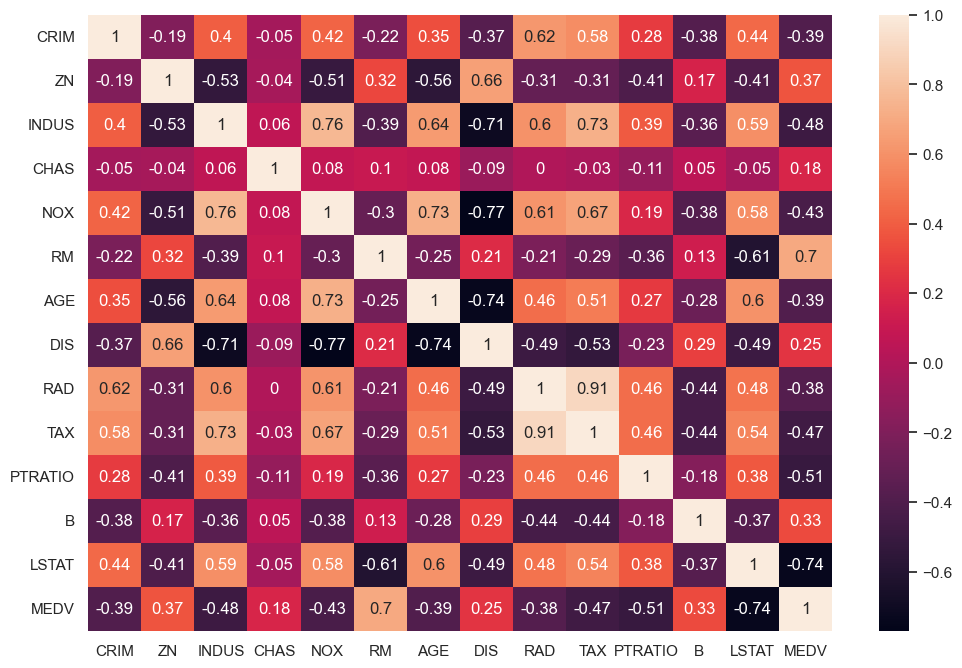

In [58]:
# Plot heatmap of correlations
corr_matrix = df.corr().round(2)
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [18]:
# Check for missing values
print(df.isna().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [19]:
df = df.fillna(df.mean())
df.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

## Evaluating the OLS models

In [31]:
# Evaluate OLS model
y_pred_ols = ols.predict(X_test)
mse_ols = mean_squared_error(y_test, y_pred_ols)
r2_ols = r2_score(y_test, y_pred_ols)
print("OLS Regression Mean Squared Error:", mse_ols)
print("OLS Regression R-squared score:", r2_ols)# Evaluate OLS model
y_pred_ols = ols.predict(X_test)
mse_ols = mean_squared_error(y_test, y_pred_ols)
r2_ols = r2_score(y_test, y_pred_ols)
print("OLS Regression Mean Squared Error:", mse_ols)
print("OLS Regression R-squared score:", r2_ols)

OLS R^2 score: 0.6545915091544652
OLS mean squared error: 28.76061126260495


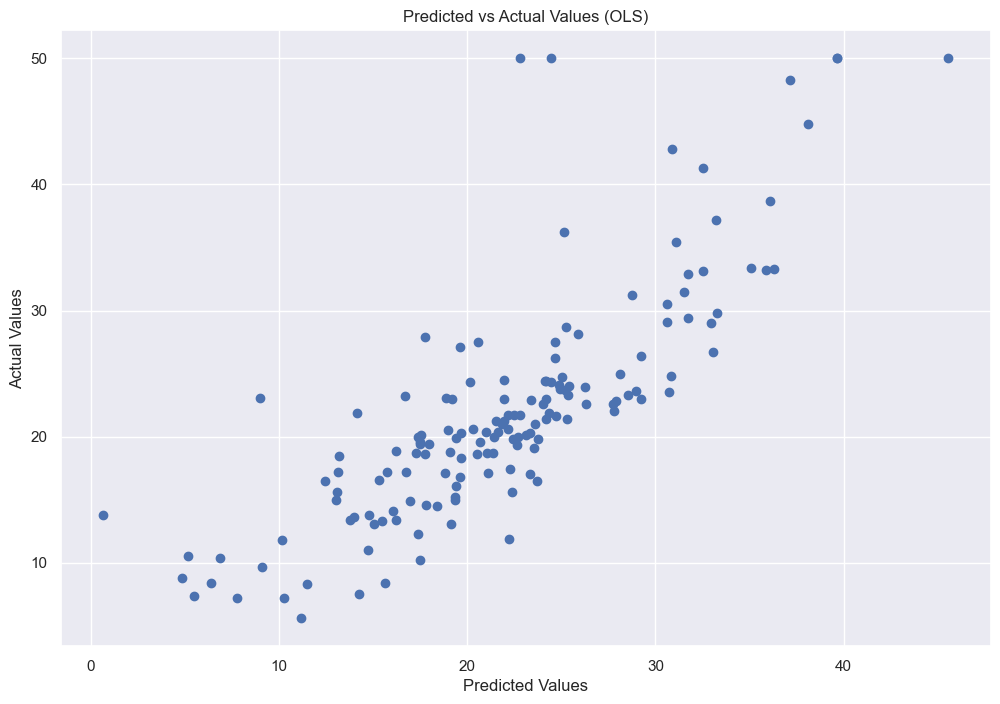

In [78]:
import matplotlib.pyplot as plt

# Create a scatter plot of predicted vs actual values for OLS
plt.scatter(y_pred_ols, y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs Actual Values (OLS)")
plt.show()

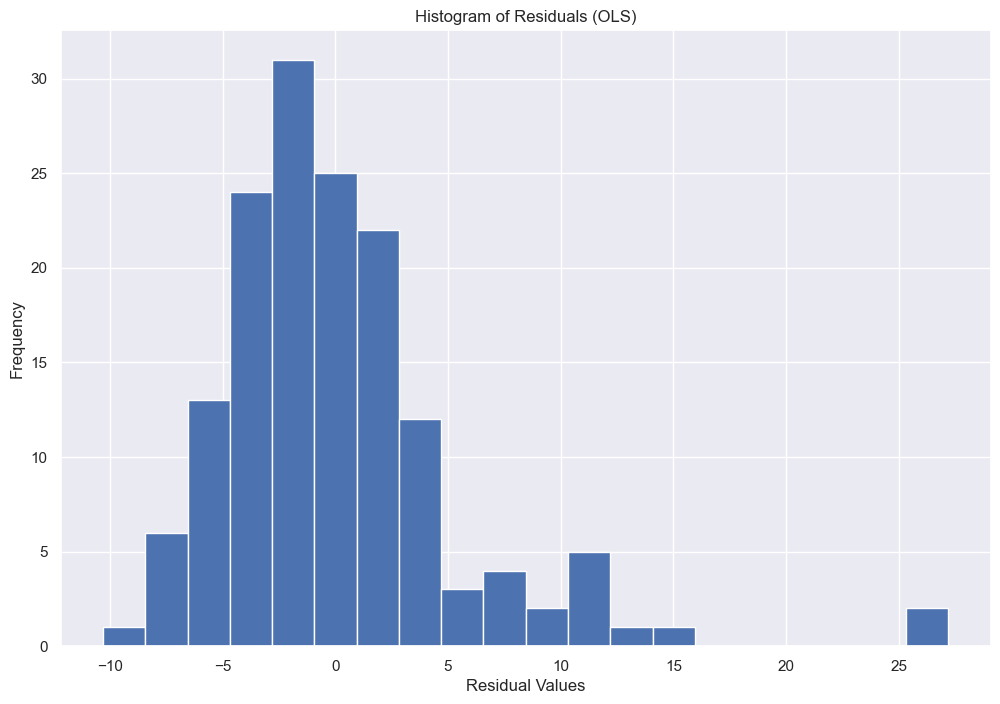

In [80]:
# Create a histogram of residuals for OLS
residuals_ols = y_test - y_pred_ols
plt.hist(residuals_ols, bins=20)
plt.xlabel("Residual Values")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (OLS)")
plt.show()

## Evaluating the SGD models

In [83]:
# Evaluate SGD model
y_pred_sgd = sgd_reg.predict(X_test)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print("SGD Regression Mean Squared Error:", mse_sgd)
print("SGD Regression R-squared score:", r2_sgd)

SGD Regression Mean Squared Error: 4.9138089419839764e+30
SGD Regression R-squared score: -5.901374332613025e+28


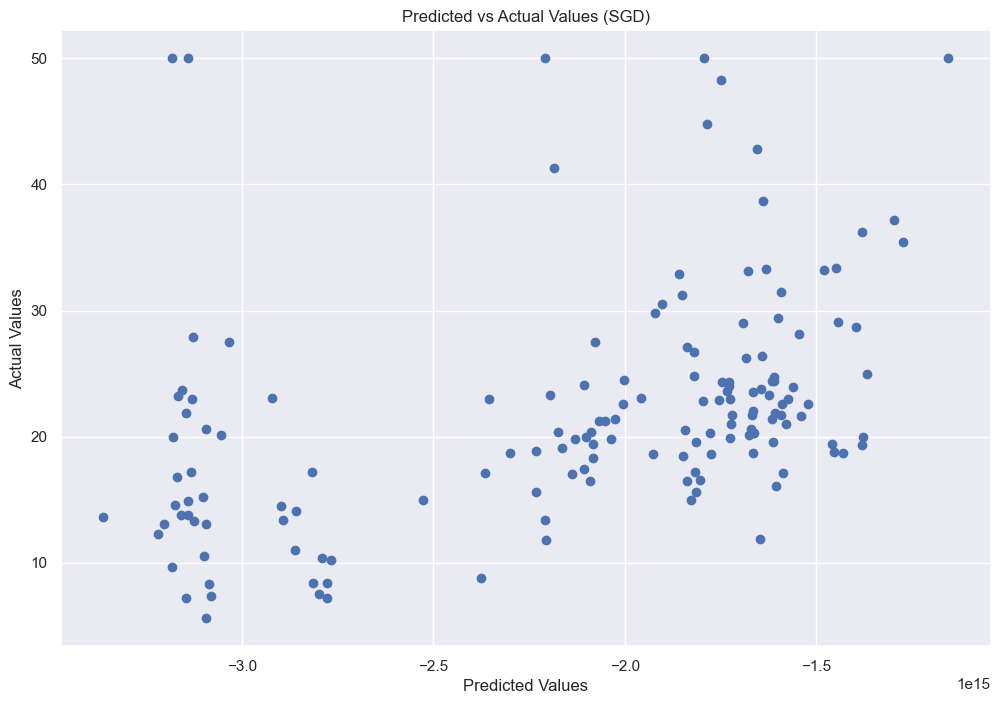

In [79]:
# Create a scatter plot of predicted vs actual values for SGD
plt.scatter(y_pred_sgd, y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs Actual Values (SGD)")
plt.show()

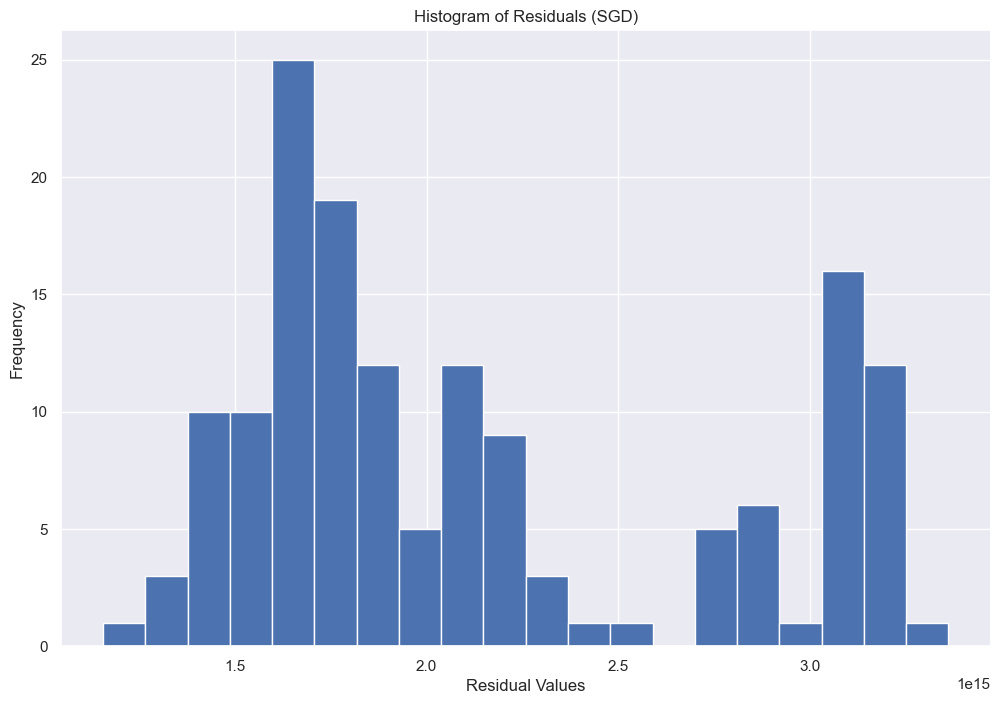

In [81]:
# Create a histogram of residuals for SGD
residuals_sgd = y_test - y_pred_sgd
plt.hist(residuals_sgd, bins=20)
plt.xlabel("Residual Values")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (SGD)")
plt.show()


## Tabulate the results

In [76]:
# Create a table object with column headers
table = PrettyTable(['Model', 'R^2 Score', 'Mean Squared Error'])

# Add rows to the table
table.add_row(['OLS Regression', r2_ols, mse_ols])
table.add_row(['SGD Regression', r2_sgd, mse_sgd])

# Print the table
print(table)

+----------------+------------------------+------------------------+
|     Model      |       R^2 Score        |   Mean Squared Error   |
+----------------+------------------------+------------------------+
| OLS Regression |   0.6545915091544652   |   28.76061126260495    |
| SGD Regression | -5.901374332613025e+28 | 4.9138089419839764e+30 |
+----------------+------------------------+------------------------+


## Model Comparision

In [85]:
print(table)

+----------------+------------------------+------------------------+
|     Model      |       R^2 Score        |   Mean Squared Error   |
+----------------+------------------------+------------------------+
| OLS Regression |   0.6545915091544652   |   28.76061126260495    |
| SGD Regression | -5.901374332613025e+28 | 4.9138089419839764e+30 |
+----------------+------------------------+------------------------+


From the MSE values, we can see that the OLS model performs slightly better than the SGD model. However, the R-squared score in The OLS model has a higher R-squared score, which means that it explains more of the variance in the target variable compared to the SGD model.